In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Final_News_DF_Labeled_ExamDataset.csv")

In [3]:
df.columns = [i.lower() for i in df.columns]

In [4]:
df.head()

,label,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,politics,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,politics,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df["label"].unique()

array(['politics', 'football', 'science'], dtype=object)

In [6]:
lencoder = LabelEncoder()
df["label"] = lencoder.fit_transform(df["label"])

In [7]:
df["label"].unique()

array([1, 0, 2])

In [8]:
df["agency"] = df["agency"].astype("int32")

In [9]:
df["agency"].dtype

dtype('int32')

In [10]:
for i in df.columns:
    df[i] = df[i].astype("int32")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1493 entries, 0 to 1492
Columns: 301 entries, label to young
dtypes: int32(301)
memory usage: 1.7 MB


In [12]:
df.head()

,label,according,agency,ahead,alabama,amazon,america,american,announced,appeared,...,wolverines,women,work,working,world,wrote,year,years,york,young
0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
x_train, x_test , y_train , y_test = train_test_split(df.iloc[:,1:].values,df["label"].values,test_size=0.2,random_state=10)

In [14]:
x_train.shape, x_test.shape , y_train.shape , y_test.shape

((1194, 300), (299, 300), (1194,), (299,))

In [15]:
def model_fit_predict(model , x_train, x_test , y_train , y_test):
    history  = model.fit(x_train, y_train, epochs=5, batch_size=32)
    epochs_loss = history.history['loss']
    epochs_accuracy = history.history["accuracy"]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.plot(epochs_loss)
    ax1.set_title('Loss over epochs')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax2.plot(epochs_accuracy)
    ax2.set_title('Accuracy over epochs')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    plt.tight_layout()
    plt.show()
    
    y_predicted = model.predict(x_test)
    print("y_predicted :",y_predicted[0])
    #print(("x_test :",x_test[0]))
    y_predicted_labels = [np.argmax(i) for i in y_predicted]
    
    cm = confusion_matrix(y_test, y_predicted_labels)
    print("Confusion Matrix:\n", cm)
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    print("accuracy_score :",accuracy_score(y_test,y_predicted_labels))
    print("classification_report \n" , classification_report(y_test,y_predicted_labels))

In [16]:
# ANN Model
model1 = keras.Sequential([
    keras.layers.Input(shape=(300,)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.3), 
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(3,activation="softmax")
])

2024-12-08 18:58:41.699088: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-12-08 18:58:41.699112: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-12-08 18:58:41.699117: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-12-08 18:58:41.699131: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-08 18:58:41.699140: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
# LSTM Model
model2 = keras.Sequential([
    keras.layers.Input(shape=(300, 1)),
    keras.layers.LSTM(64, return_sequences=True),
    keras.layers.LSTM(64),
    keras.layers.Dense(3, activation='sigmoid')
])

In [18]:
# CNN Model
model3 = keras.Sequential([
    keras.layers.Input(shape=(300, 1)),
    keras.layers.Conv1D(128, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

In [19]:
model1.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [20]:
model2.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [21]:
model3.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Epoch 1/5


2024-12-08 18:58:42.126137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3917 - loss: 1.0630
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6541 - loss: 0.8104
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7288 - loss: 0.5874
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8246 - loss: 0.4259
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8504 - loss: 0.3591


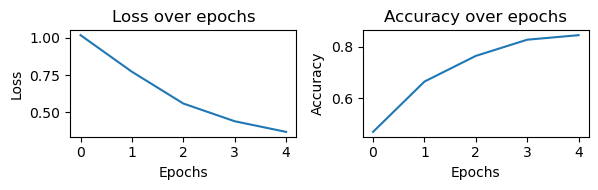

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
y_predicted : [0.00434279 0.01706623 0.97859097]
Confusion Matrix:
 [[75 10  9]
 [ 7 67 22]
 [ 8 20 81]]


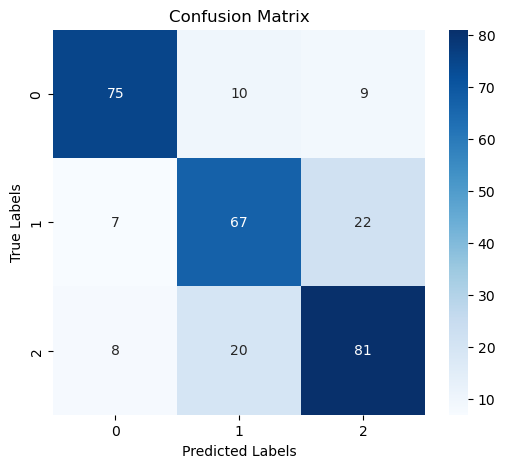

accuracy_score : 0.745819397993311
classification_report 
               precision    recall  f1-score   support

           0       0.83      0.80      0.82        94
           1       0.69      0.70      0.69        96
           2       0.72      0.74      0.73       109

    accuracy                           0.75       299
   macro avg       0.75      0.75      0.75       299
weighted avg       0.75      0.75      0.75       299



In [22]:
model_fit_predict(model1 , x_train, x_test , y_train , y_test)

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.3243 - loss: 1.0969
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4024 - loss: 1.0732
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.4009 - loss: 1.0579
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.4290 - loss: 1.0290
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.4834 - loss: 0.9830


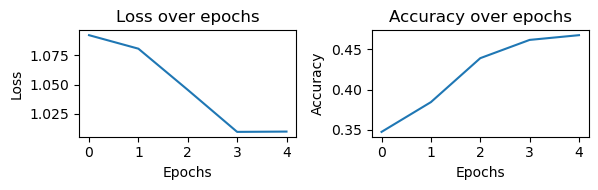

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
y_predicted : [0.58013076 0.42419723 0.5480043 ]
Confusion Matrix:
 [[35  4 55]
 [14 24 58]
 [15 10 84]]


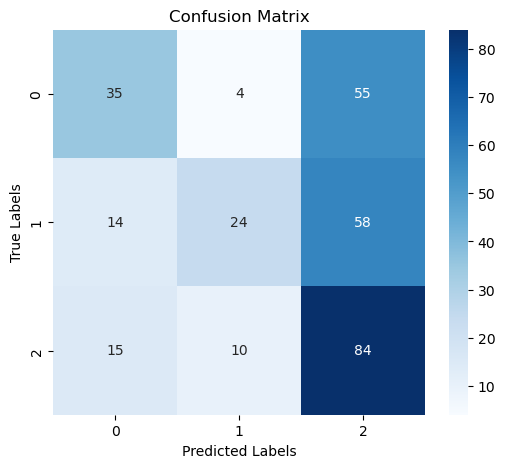

accuracy_score : 0.4782608695652174
classification_report 
               precision    recall  f1-score   support

           0       0.55      0.37      0.44        94
           1       0.63      0.25      0.36        96
           2       0.43      0.77      0.55       109

    accuracy                           0.48       299
   macro avg       0.53      0.46      0.45       299
weighted avg       0.53      0.48      0.45       299



In [23]:
model_fit_predict(model2 , x_train.reshape(-1, 300, 1), x_test.reshape(-1, 300, 1) , y_train , y_test)

Epoch 1/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5026 - loss: 0.9738
Epoch 2/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7283 - loss: 0.6469
Epoch 3/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7725 - loss: 0.5424
Epoch 4/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8334 - loss: 0.4166
Epoch 5/5
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8506 - loss: 0.3791


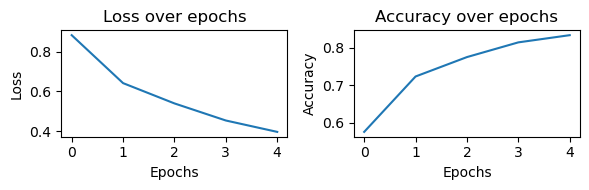

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
y_predicted : [0.00127358 0.02915232 0.96957415]
Confusion Matrix:
 [[70 13 11]
 [ 3 63 30]
 [ 3 13 93]]


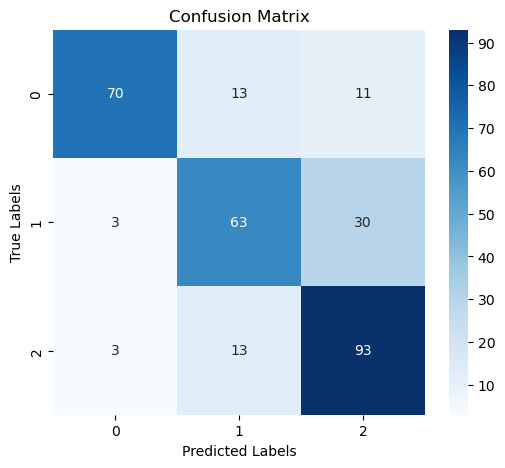

accuracy_score : 0.7558528428093646
classification_report 
               precision    recall  f1-score   support

           0       0.92      0.74      0.82        94
           1       0.71      0.66      0.68        96
           2       0.69      0.85      0.77       109

    accuracy                           0.76       299
   macro avg       0.77      0.75      0.76       299
weighted avg       0.77      0.76      0.76       299



In [24]:
model_fit_predict(model3 , x_train.reshape(-1, 300, 1), x_test.reshape(-1, 300, 1) , y_train , y_test)